# **Estatística do Básico ao Avançado (EBA)**

## **Desafio Ifood - Estatística Descritiva**

O conjunto de dados é composto por clientes da empresa Ifood com dados sobre:

- Perfis de clientes
- Preferências do produto
- Sucessos/fracassos da campanha
- Desempenho do canal


In [293]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("dark")
%matplotlib inline
%config InlineBackend.figure_format = "retina"

**Carregando o dataset**

In [294]:
df_ifood = pd.read_csv("./mkt_data.csv")
df_ifood.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407


In [295]:
df_ifood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

#### **Objetivo**

O objetivo de hoje é fazer uma análise exploratória desses dados. Responda usando a sua ferramenta de preferência:

- ***1. Quantos dados temos? Linhas e colunas***
- ***2. Quais são as colunas numéricas?***
- ***3. Temos duplicados na nossa base? Se tivermos, retire-os*** 
- ***4. Temos dados nulos nessa base? Será que eles indicam algo? O que fazer com eles?***
- ***5. Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas numéricas?***

- ***1. Quantos dados temos? Linhas e colunas***

> Podemos obter as informaçẽos relativa as linhas e coluna de um DataFrame pandas atraves do atribulto `.shape`, ele nos retorna uma tupla sendo a primeira posição a quantidade de linhas e a segunda posição o número de colunas.

In [296]:
n_linhas = df_ifood.shape[0]
n_colunas = df_ifood.shape[1]

print(f"\nLinhas: {n_linhas}")
print(f"\nColunas: {n_colunas}")


Linhas: 2205

Colunas: 44


- ***2. Quais são as colunas numéricas?***

In [297]:
print(df_ifood.select_dtypes(
    include=['int', 'float'])
    .columns.values)
 
 
print("\n\nQuanidade: ",
       df_ifood.select_dtypes(
        include=['int', 'float'])
        .columns.shape[0])

['Unnamed: 0' 'Income' 'Kidhome' 'Teenhome' 'Recency' 'MntWines'
 'MntFruits' 'MntMeatProducts' 'MntFishProducts' 'MntSweetProducts'
 'MntGoldProds' 'NumDealsPurchases' 'NumWebPurchases'
 'NumCatalogPurchases' 'NumStorePurchases' 'NumWebVisitsMonth'
 'AcceptedCmp3' 'AcceptedCmp4' 'AcceptedCmp5' 'AcceptedCmp1'
 'AcceptedCmp2' 'Complain' 'Z_CostContact' 'Z_Revenue' 'Response' 'Age'
 'Customer_Days' 'marital_Divorced' 'marital_Married' 'marital_Single'
 'marital_Together' 'marital_Widow' 'education_2n Cycle' 'education_Basic'
 'education_Graduation' 'education_Master' 'education_PhD' 'MntTotal'
 'MntRegularProds' 'AcceptedCmpOverall' 'kids' 'expenses']


Quanidade:  42


- ***3. Temos duplicados na nossa base? Se tivermos, retire-os*** 

In [298]:
print(f"\nQuantidade de duplicações: {df_ifood.duplicated().sum()}")


Quantidade de duplicações: 0


- ***4. Temos dados nulos nessa base? Será que eles indicam algo? O que fazer com eles?***

In [299]:
df_ifood.isnull().sum()

Unnamed: 0                 0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Customer_Days              0
marital_Divorced        1975
marital_Married         1351
marital_Single          1728
marital_Together        1637
marital_Widow           2129
education_2n Cycle      2007
education_Basic         2151
education_Grad

In [300]:
colunas_dados_faltante = (
    [(name, i) for i, name in zip(df_ifood.isnull().sum(),
             df_ifood.isnull().sum().index) if i != 0])
print(f"\nLinhas Total do DataFrame: {n_linhas}")
display(colunas_dados_faltante)


Linhas Total do DataFrame: 2205


[('marital_Divorced', 1975),
 ('marital_Married', 1351),
 ('marital_Single', 1728),
 ('marital_Together', 1637),
 ('marital_Widow', 2129),
 ('education_2n Cycle', 2007),
 ('education_Basic', 2151),
 ('education_Graduation', 1092),
 ('education_Master', 1841),
 ('education_PhD', 1729)]

In [301]:
def percent_dados_faltantes_colunas(colunas):
    print()
    for nome_col, valor in colunas:
        dados_falt = (((valor/n_linhas)*100))
        print(f"\nDados Faltantes: {nome_col}: {dados_falt:.2f}%")
    print()
percent_dados_faltantes_colunas(colunas_dados_faltante)



Dados Faltantes: marital_Divorced: 89.57%

Dados Faltantes: marital_Married: 61.27%

Dados Faltantes: marital_Single: 78.37%

Dados Faltantes: marital_Together: 74.24%

Dados Faltantes: marital_Widow: 96.55%

Dados Faltantes: education_2n Cycle: 91.02%

Dados Faltantes: education_Basic: 97.55%

Dados Faltantes: education_Graduation: 49.52%

Dados Faltantes: education_Master: 83.49%

Dados Faltantes: education_PhD: 78.41%



*Após análise das colunas com dados faltantes, nota-se a presença significativa de valores ausentes. Diante disso, uma alternativa viável seria excluir tais colunas das análises, uma vez que a falta de dados pode distorcer as conclusões obtidas.*

- ***5. Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas numéricas?***

In [302]:
df_ifood.describe().style.background_gradient(axis=0)

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,kids,expenses
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,230.000000,854.000000,477.000000,568.000000,76.000000,198.000000,54.000000,1113.000000,364.000000,476.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,1102.000000,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.000000,11.000000,0.151020,51.095692,2512.718367,1.000000,5.000000,4.000000,3.000000,2.000000,1.000000,2.000000,3.000000,4.000000,5.000000,562.764626,518.707483,0.299320,0.948753,562.764626
std,636.672993,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.000000,0.000000,0.358150,11.705801,202.563647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,575.936911,553.847248,0.680440,0.749231,575.936911
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000,24.000000,2159.000000,1.000000,5.000000,4.000000,3.000000,2.000000,1.000000,2.000000,3.000000,4.000000,5.000000,4.000000,-283.000000,0.000000,0.000000,4.000000
25%,551.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000,43.000000,2339.000000,1.000000,5.000000,4.000000,3.000000,2.000000,1.000000,2.000000,3.000000,4.000000,5.000000,56.000000,42.000000,0.000000,0.000000,56.000000
50%,1102.000000,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000,50.000000,2515.000000,1.000000,5.000000,4.000000,3.000000,2.000000,1.000000,2.000000,3.000000,4.000000,5.000000,343.000000,288.000000,0.000000,1.000000,343.000000
75%,1653.000000,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.000000,0.000000,61.000000,2688.000000,1.000000,5.000000,4.000000,3.000000,2.000000,1.000000,2.000000,3.000000,4.000000,5.000000,964.000000,884.000000,0.000000,1.000000,964.000000
max,2204.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,11.000000,1.000000,80.000000,2858.000000,1.000000,5.000000,4.000000,3.000000,2.000000,1.000000,2.000000,3.000000,4.000000,5.000000,2491.000000,2458.000000,4.000000,3.000000,2491.000000


#### ***Vamos agora entender o perfil de clientes que temos***

- ***Qual é o maior salário encontrado na nossa base? Veja na coluna Income.***
- ***Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem? Veja na coluna Income.***
- ***Nossos clientes tem níveis de educação maiores ou menores? Veja na coluna education_level.***
- ***Quantos clientes temos em cada estado civil? Veja na coluna marital_status.***

- ***Qual é o maior salário encontrado na nossa base? Veja na coluna Income.***

In [303]:
print(f"\nMaior Salário R$ = {df_ifood['Income'].max()}")


Maior Salário R$ = 113734.0


- ***Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem? Veja na coluna Income.***

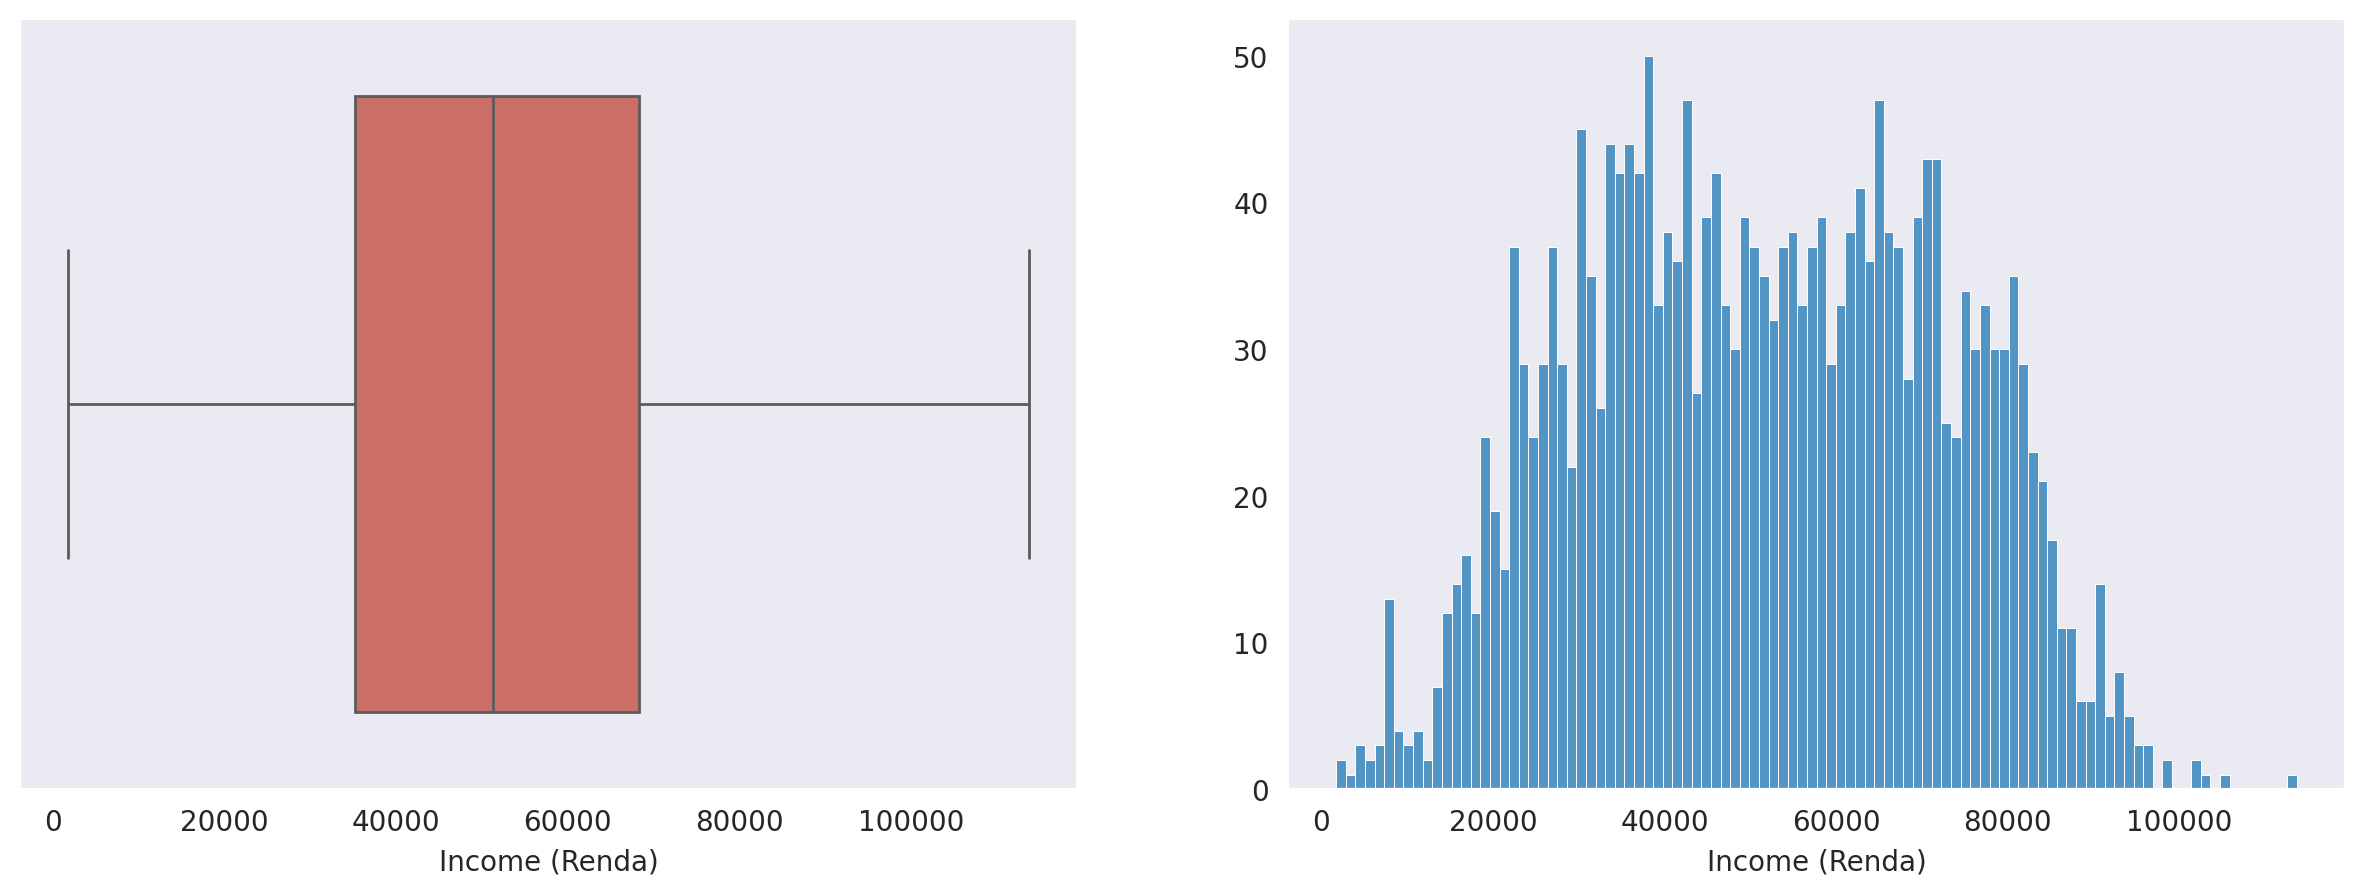

In [304]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=df_ifood.Income,
            color=sns.color_palette("hls", 1).as_hex()[0], ax=axes[0])
axes[0].set_xlabel("Income (Renda)")
sns.histplot(x=df_ifood.Income, bins=100, ax=axes[1])
axes[1].set_xlabel("Income (Renda)")
axes[1].set_ylabel("")
plt.show()

In [305]:
from scipy.stats import skew
skew_income = skew(df_ifood.Income)
print(f"\nAssimetria da amostra Income (Renda): {skew_income:.4f}")


Assimetria da amostra Income (Renda): 0.0132


*Ao examinar os gráficos de Boxplot e Histograma do atributo 'Income' (renda), em conjunto com o cálculo utilizando o método `skew` da biblioteca `scipy` que retornou um valor abaixo de 1, conclui-se que não há assimetria aparente nos dados. Portanto, é possível inferir que os dados se aproximam de uma distribuição normal.*

- ***Nossos clientes tem níveis de educação maiores ou menores? Veja na coluna education_level.***

In [306]:
edu_level = (df_ifood
            .education_level
            .value_counts()
            .to_frame()
            .reset_index())
edu_level

,education_level,count
0,Graduation,1113
1,PhD,476
2,Master,364
3,2n Cycle,198
4,Basic,54


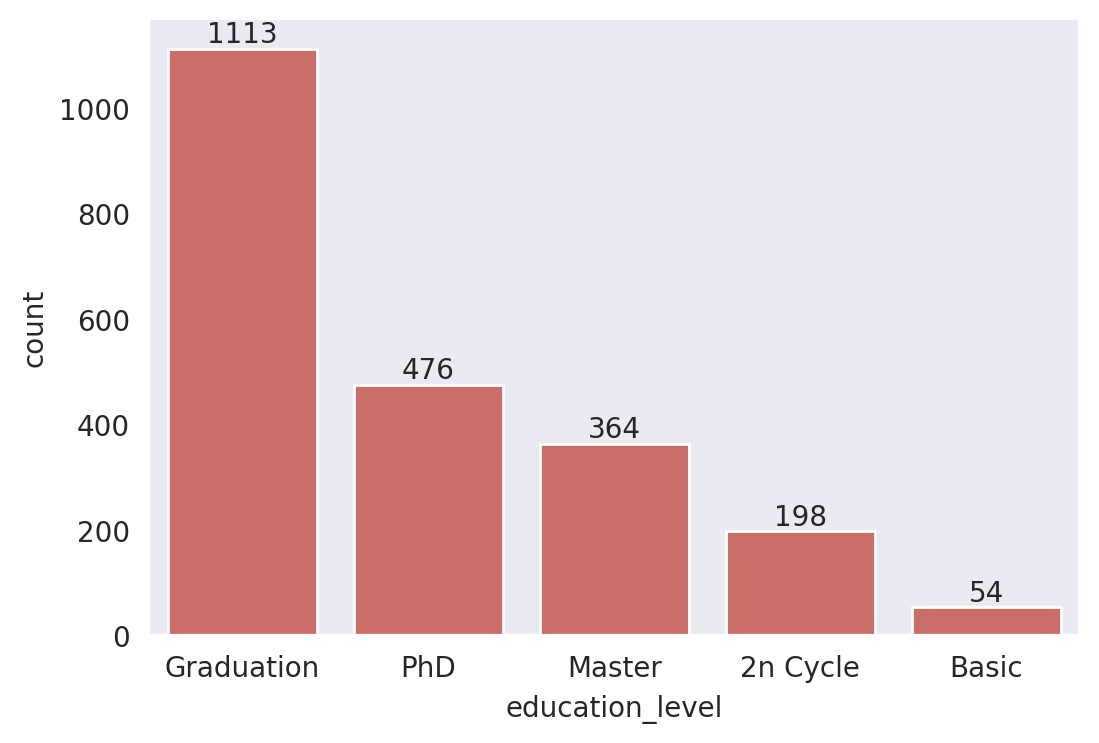

In [307]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=edu_level, x="education_level", y="count",
                 color=sns.color_palette("hls", 1).as_hex()[0])
ax.bar_label(ax.containers[0]);
plt.show()

*A partir da análise do gráfico de colunas que plota a frequências das categorias, pode-se observar que os clientes possuem níveis maiores de educação.*


- ***Quantos clientes temos em cada estado civil? Veja na coluna marital_status.***

In [308]:
marit_status = (df_ifood
            .marital_status
            .value_counts()
            .to_frame()
            .reset_index())
marit_status

,marital_status,count
0,Married,854
1,Together,568
2,Single,477
3,Divorced,230
4,Widow,76


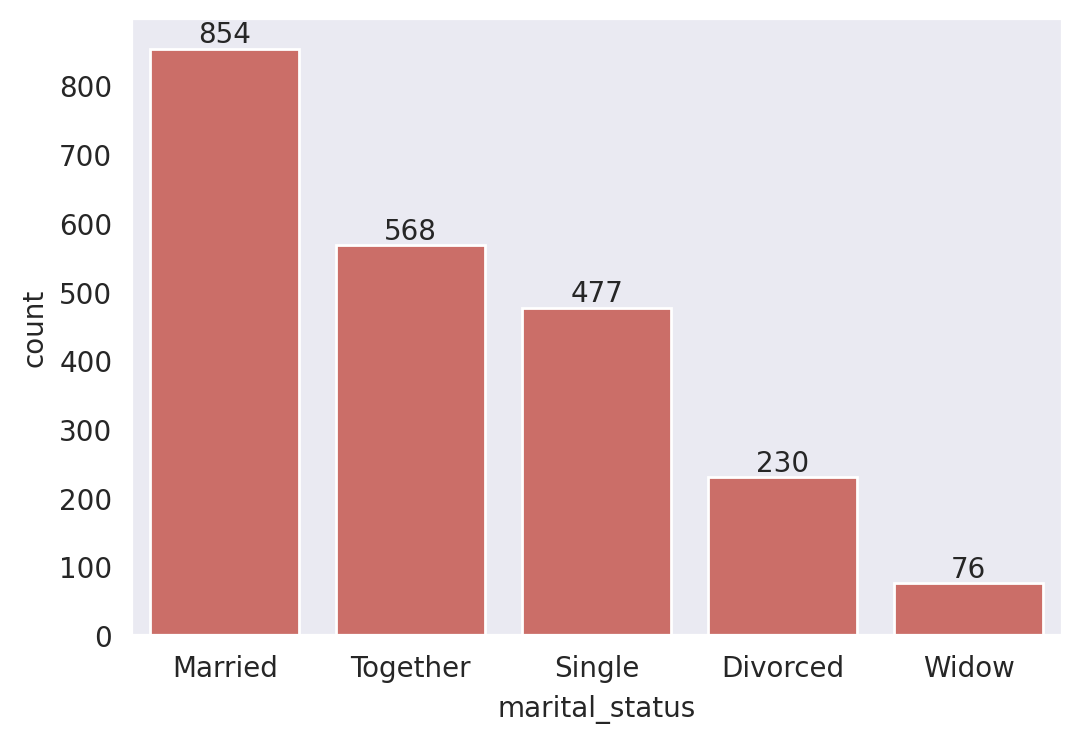

In [309]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=marit_status, x="marital_status", y="count",
                 color=sns.color_palette("hls", 1).as_hex()[0])
ax.bar_label(ax.containers[0]);
plt.show()

#### ***Agora vamos ver como os dados se correlacionam***

- ***Qual é a relação de estado civil com número de filhos? Será que as pessoas casadas têm um maior número de filhos? Filhos está na coluna kids.***
- ***As pessoas gastam mais ou menos em nossa plataforma quando têm filhos? Veja nas colunas expenses e kids.***
- ***Pessoas que têm um maior salário gastam mais? Veja nas colunas Income e expenses.***


- ***Qual é a relação de estado civil com número de filhos? Será que as pessoas casadas têm um maior número de filhos? Filhos está na coluna kids.***

In [310]:
marit_status_kids = (df_ifood
                     .groupby(by=["marital_status", "kids"])
                     ["kids"].count().to_frame())
marit_status_kids.head(8)

kids
marital_status kids      
Divorced       0       57
               1      119
               2       49
               3        5
Married        0      227
               1      444
               2      167
               3       16

In [311]:
marit_status_kids = marit_status_kids.rename(columns={'kids': 'qt_kids'})
marit_status_kids = marit_status_kids.reset_index()
marit_status_kids.head(8)

,marital_status,kids,qt_kids
0,Divorced,0,57
1,Divorced,1,119
2,Divorced,2,49
3,Divorced,3,5
4,Married,0,227
5,Married,1,444
6,Married,2,167
7,Married,3,16


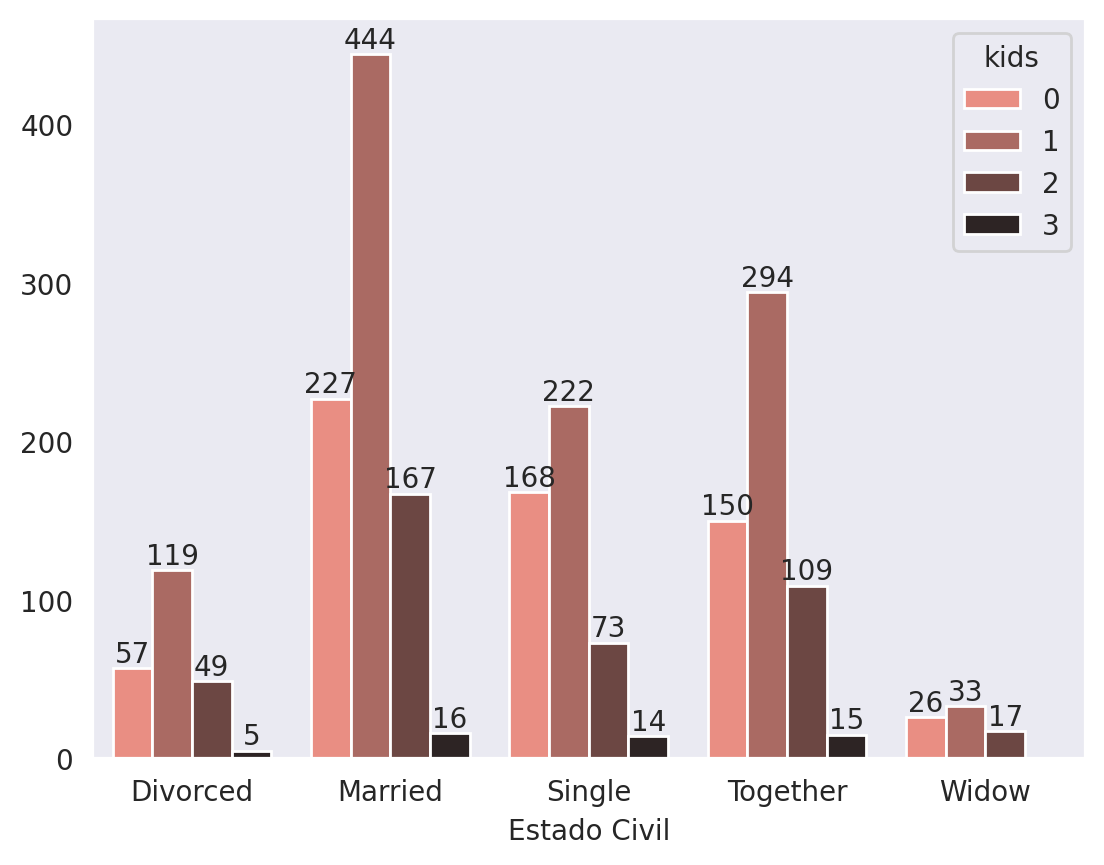

In [312]:
ax = sns.barplot(data=marit_status_kids,
                 x="marital_status", y="qt_kids",
                 hue="kids",
                 palette=sns.color_palette("dark:salmon_r", as_cmap=True)
            )
for container in ax.containers:
    ax.bar_label(container);
plt.ylabel("")
plt.xlabel("Estado Civil")
plt.show()

*Após analisar as frequências de filhos por estado civil, percebe-se que os casados têm uma proporção maior de filhos em comparação com os outros estados civis. Além disso, pode-se inferir que em todos os estados civis, ter um filho é o evento mais comum.*

- ***As pessoas gastam mais ou menos em nossa plataforma quando têm filhos? Veja nas colunas expenses e kids.***


In [313]:
mean_expenses = (df_ifood
                 .groupby(by=["kids"])
                 ["expenses"]
                 .mean()
                 .round(2)
                 .to_frame()
                 .reset_index())
mean_expenses

,kids,expenses
0,0,1041.21
1,1,434.53
2,2,221.57
3,3,237.38


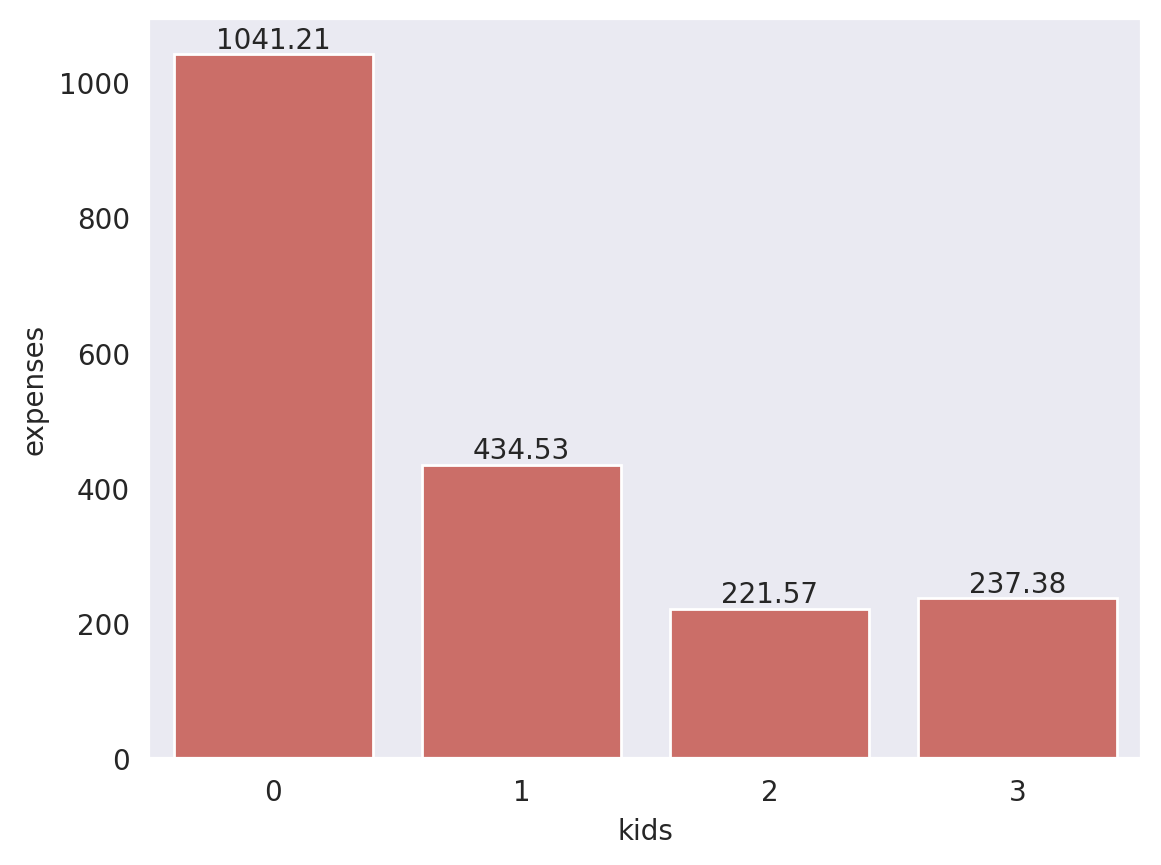

In [314]:
ax = sns.barplot(mean_expenses, x="kids", y="expenses",
                 color=sns.color_palette("hls", 1).as_hex()[0])
ax.bar_label(ax.containers[0]);

*Com base na análise do gráfico da média de gastos, observa-se que pessoas com filhos tendem a gastar menos em comparação com aquelas sem filhos.*

- ***Pessoas que têm um maior salário gastam mais? Veja nas colunas Income e expenses.***

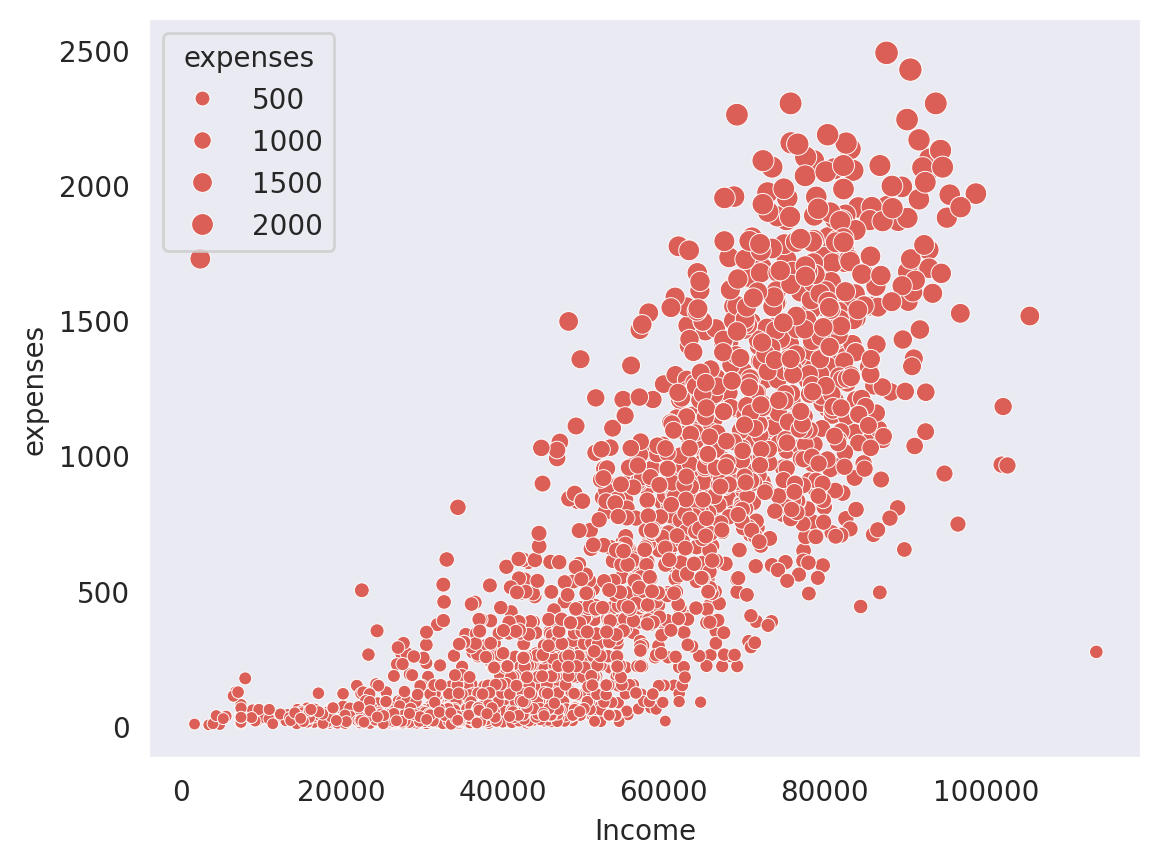

In [315]:
sns.scatterplot(data=df_ifood,
                x="Income",
                y="expenses",
                size="expenses",
                color=sns.color_palette("hls", 1).as_hex()[0])
plt.show()

Pode-se observar que à medida que o poder aquisitivo das pessoas aumenta, seus gastos também aumentam.

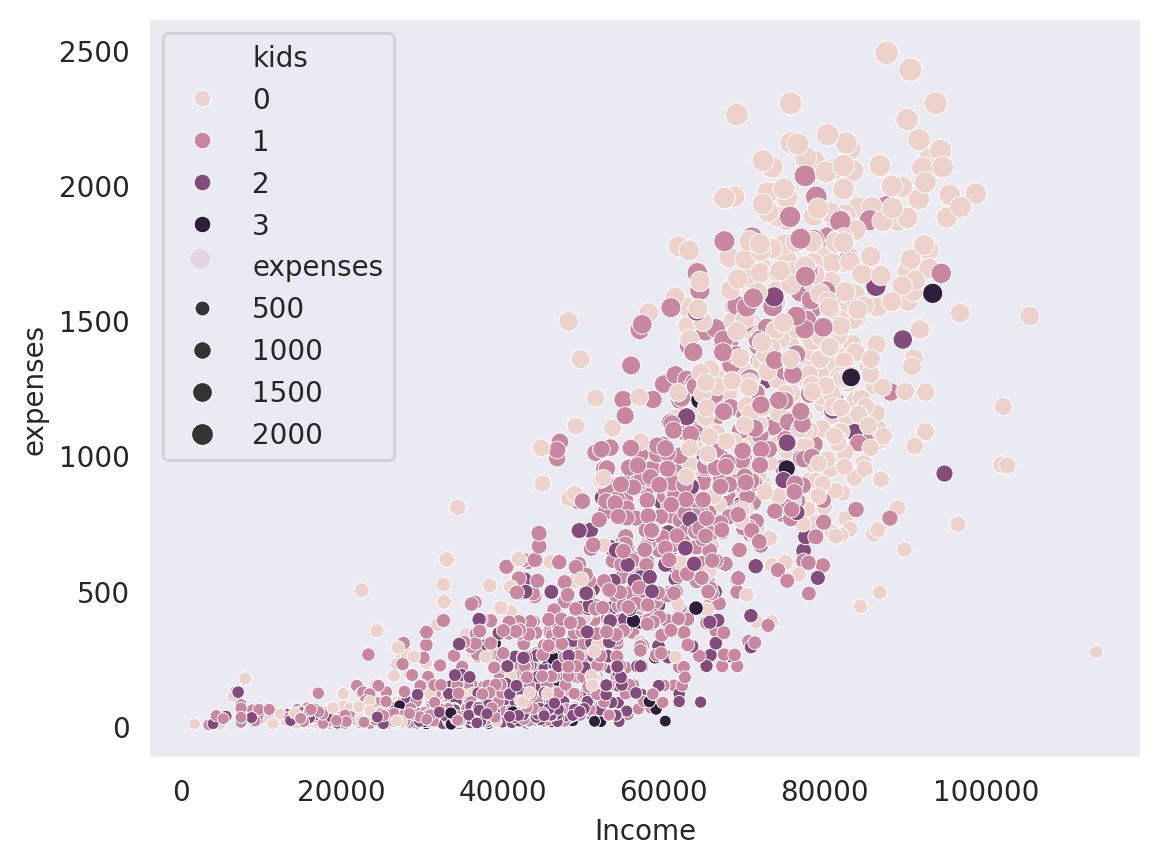

In [316]:
sns.scatterplot(data=df_ifood,
                x="Income",
                y="expenses",
                size="expenses",
                hue="kids")
plt.show()

Além disso, podemos observar que pessoas sem filhos têm uma renda maior.

#### ***Vá além!***

- ***O que você faria com as informações que tirou das perguntas acima?***
- ***Trace um problema de negócios e faça quantas perguntas forem necessárias para respondê-la.​***



- ***O que você faria com as informações que tirou das perguntas acima?***

*Com as informações obtidas, é possível criar perfis relacionados ao nível de formação, renda, estrutura familiar, entre outros aspectos. Esses perfis podem ser utilizados para abordar e solucionar questões de negócios de forma mais precisa e direcionada.*

- ***Trace um problema de negócios e faça quantas perguntas forem necessárias para respondê-la.​***

Problema de negócio: Pessoas com maior poder aquisitivos tem tendem a 